<h2>The adverse health effects of air pollution - are we making any progress?</h2>
<p><img src=air.jpg width="900"></p>
<p><strong>Credit:</strong>  <a href="https://www.flickr.com/people/44221799@N08/">Flickr/E4C</a> </p>

<h2>Introduction</h2>
<p><strong>Business Context.</strong> Air pollution is a very serious issue that the global population is currently dealing with. The abundance of air pollutants is not only contributing to global warming, but it is also causing problematic health issues to the population. There have been numerous efforts to protect and improve air quality across most nations. However, it seems that we are making very little progress. One of the main causes of this is the fact that the majority of air pollutants are derived from the burning of fossil fuels such as <em>coal</em>. Big industries and several other economical and political factors have slowed the progress towards the use of renewable energy by promoting the use of fossil fuels. Nevertheless, if we educate the general population and create awareness of this issue, we will be able to overcome this problem in the future.      </p>
<p>For this case, you have been hired as a data science consultant for an important environmental organization. In order to promote awareness of environmental and greenhouse gas issues, your client is interested in a study of <strong>plausible impacts of air contamination on the health of the global population</strong>. They have gathered some <em>raw</em> data provided by the <a href="https://www.who.int/">World Health Organization</a>, <a href="http://www.healthdata.org/">The Institute for Health Metrics and Evaluation</a> and the <a href="https://www.worldbank.org/">World Bank Group</a>. Your task is to conduct data analysis, search for potential information, and create visualizations that the client can use for their campaigns and grant applications. </p>
<p><strong>Analytical Context.</strong> You are given a folder, named <code>files</code> with <em>raw</em> data. This data contains quite a large number of variables and it is in a fairly disorganized state. In addition, one of the datasets contains very poor documentation, segmented into several datasets. Your objective will be to:</p>
<ol>
<li>Extract and clean the relevant data. You will have to manipulate several datasets to obtain useful information for the case. </li>
<li>Conduct Exploratory Data Analysis. You will have to create meaningful plots, formulate meaningful hypotheses and study the relationship between various indicators related to air pollution.</li>
</ol>
<p>Additionally, the client has some broad questions they would like to answer:<br />
1. Are we making any progress in reducing the amount of emitted pollutants across the globe?<br />
2. Which are the critical regions where we should start environmental campaigns?<br />
3. Are we making any progress in the prevention of deaths related to air pollution?<br />
4. Which demographic characteristics seem to correlate with the number of health-related issues derived from air pollution? </p>

### Load relevant python libraries for the case study.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
import scipy 

def missing_features(df):
    mask = df.isnull()
    total = mask.sum()
    percent = 100*mask.mean()
    missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['count_missing', 'perc_missing'])
    missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)
    return missing_data


warnings.filterwarnings("ignore")  # Suppress all warnings

<h3>Extracting and cleaning relevant data</h3>
<p>Let's take a look at the data provided by the client in the <code>files</code> folder. There, we see another folder  named <code>WDI_csv</code> with several CSV files corresponding to the World Bank's primary <a href="https://datacatalog.worldbank.org/dataset/world-development-indicators">World Development Indicators</a>. The client stated that this data may contain some useful information relevant to our study, but they have not told us anything aside from that. Thus, we are on our own in finding and extracting the relevant data for our study. This we will do next. </p>
<p>Let's take a peek at the file <code>WDIData.csv</code>:</p>

In [3]:
WDI_data = pd.read_csv('./WDIData.csv')
WDI_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.428272,87.070576,88.176836,87.342739,89.130121,89.678685,90.273687,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.942103,75.244104,77.162305,75.538976,78.741152,79.665635,80.749293,NaN,NaN,NaN


<p>Since we are interested in environmental indicators, we must get rid of any rows not relevant to our study. However, the number of indicators seems to be quite large and a manual inspection seems impossible. Let's load the file <code>WDISeries.csv</code> which seems to contain more information about the indicators:</p>

<p>Extract all the rows that have the topic key <em>Environment</em> in <code>WDI_ids</code>. Add to the resulting DataFrame a new column named <code>Subtopic</code> which contains the corresponding subtopic of the indicator. For example, the subtopic of <code>Environment: Agricultural production</code> is <code>Agricultural production</code>. Which subtopics do you think are of interest to us?</p>

In [4]:
WDI_ids = pd.read_csv('./WDISeries.csv')
WDI_ids = WDI_ids.loc[:, ~WDI_ids.columns.str.contains('^Unnamed')]
environment = WDI_ids[WDI_ids.Topic.str.startswith('Environment')]
environment['Subtopic'] = environment.Topic.apply(lambda x: ' '.join(x.split()[1:]))
environment.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Subtopic
0,AG.AGR.TRAC.NO,Environment: Agricultural production,"Agricultural machinery, tractors",NaN,Agricultural machinery refers to the number of...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",A tractor provides the power and traction to m...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,Agricultural production
1,AG.CON.FERT.PT.ZS,Environment: Agricultural production,Fertilizer consumption (% of fertilizer produc...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,Agricultural production
2,AG.CON.FERT.ZS,Environment: Agricultural production,Fertilizer consumption (kilograms per hectare ...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,Agricultural production
3,AG.LND.AGRI.K2,Environment: Land use,Agricultural land (sq. km),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agricultural land constitutes only a part of a...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,Land use
4,AG.LND.AGRI.ZS,Environment: Land use,Agricultural land (% of land area),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agriculture is still a major sector in many ec...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,Land use


<p>Use the results of Exercise 1 to create a new DataFrame with the history of all emissions indicators for countries and major regions. Call this new DataFrame <code>Emissions_df</code>. How many emissions indicators are in the study?</p>

In [5]:
emmissions = environment[environment.Subtopic =='Emissions']
Emmissions_df = emmissions[['Indicator Name', 'Topic', 'Subtopic']].set_index('Indicator Name').join(WDI_data.set_index('Indicator Name'))
Emmissions_df.reset_index(inplace = True)
print(f'There are {Emmissions_df["Indicator Name"].nunique()} Emmissions Indicator in the study')

There are 42 Emmissions Indicator in the study


<p>The DataFrame <code>Emissions_df</code> has one column per year of observation. Data in this form is usually referred to as data in <em>wide format</em>, as the number of columns is high. However, it might be easier to query and filter the data if we had a single column containing the year in which each indicator was calculated. This way, <em>each observation will be represented by a single row</em>. Use the <code>pandas</code> function <a href="https://pandas.pydata.org/docs/reference/api/pandas.melt.html"><code>melt()</code></a> to reshape the <code>Emissions_df</code> data into <em>long format</em>. The resulting DataFrame should contain a pair of new columns named <code>Year</code> and <code>Indicator Value</code>:</p>

In [6]:
id_variables = ['Indicator Name', 'Topic', 'Subtopic', 'Country Name', 'Country Code','Indicator Code']
new_Emmissions_df = pd.melt(Emmissions_df, id_vars= id_variables, var_name='Year', value_name='Indicator Value')
print(f'Emmission dimension dataframe: {Emmissions_df.shape[0]} observations and {Emmissions_df.shape[1]} attributes')
print(f'New Emmission dimension dataframe: {new_Emmissions_df.shape[0]} observations and {new_Emmissions_df.shape[1]} attributes')
new_Emmissions_df.head()

Emmission dimension dataframe: 11088 observations and 67 attributes
New Emmission dimension dataframe: 676368 observations and 8 attributes


,Indicator Name,Topic,Subtopic,Country Name,Country Code,Indicator Code,Year,Indicator Value
0,Agricultural methane emissions (% of total),Environment: Emissions,Emissions,Arab World,ARB,EN.ATM.METH.AG.ZS,1960,NaN
1,Agricultural methane emissions (% of total),Environment: Emissions,Emissions,Caribbean small states,CSS,EN.ATM.METH.AG.ZS,1960,NaN
2,Agricultural methane emissions (% of total),Environment: Emissions,Emissions,Central Europe and the Baltics,CEB,EN.ATM.METH.AG.ZS,1960,NaN
3,Agricultural methane emissions (% of total),Environment: Emissions,Emissions,Early-demographic dividend,EAR,EN.ATM.METH.AG.ZS,1960,NaN
4,Agricultural methane emissions (% of total),Environment: Emissions,Emissions,East Asia & Pacific,EAS,EN.ATM.METH.AG.ZS,1960,NaN


<p>The column <code>Indicator Value</code> of the new <code>Emissions_df</code> contains a bunch of <code>NaN</code> values. Additionally, the <code>Year</code> column contains an <code>Unnamed: 64</code> value. What procedure should we follow to clean these missing values in our DataFrame? Proceed with your suggested cleaning process.</p>

In [7]:
## Remove the year with the Unnamed attributes and implementing the function missing_features
#### The missing feature percentage is above 50% 
#### The MISSING VALUE NOT AT RANDOM, thus the imputation will be extremely difficult after careful review.
#### Thus, the missing (Indicator Value) are removed.

df3 = new_Emmissions_df[new_Emmissions_df.Year != 'Unnamed: 64' ]
print(df3.Year.unique())
print(df3.shape)
df4 = df3.copy()
df4.dropna(inplace= True)
missing_features(df3)

['1960' '1961' '1962' '1963' '1964' '1965' '1966' '1967' '1968' '1969'
 '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979'
 '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989'
 '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019']
(665280, 8)


,count_missing,perc_missing
Indicator Value,339422,51.01942
Indicator Name,0,0.00000
Topic,0,0.00000
Subtopic,0,0.00000
Country Name,0,0.00000
Country Code,0,0.00000
Indicator Code,0,0.00000
Year,0,0.00000



<p>Split the <code>Emissions_df</code> into two DataFrames, one containing only countries and the other containing only regions. Name these <code>Emissions_C_df</code> and <code>Emissions_R_df</code> respectively.</p>

In [8]:
WDI_country = pd.read_csv('./WDICountry.csv')
WDI_country = WDI_country.loc[:, ~WDI_country.columns.str.contains('Unnamed')]
df5 = WDI_country.copy()
df5['Region']=  np.where(df5['Region'].isna(), df5['Short Name'],df5['Region'])
Region = list(df5.Region.unique() )
for i in df4['Country Name'].unique():
    if '(IDA & IBRD countries)' in i:
        Region.append(i)
Emmissions_R_df = df4[df4['Country Name'].isin(Region)]
Emmissions_C_df = df4[~df4['Country Name'].isin(Region)]

<h3>Finalizing the cleaning for our study</h3>
<p>Our data has improved a lot by now. However, since the number of indicators is still quite large, let us focus our study on the following indicators for now:</p>
<ul>
<li>
<p><strong>Total greenhouse gas emissions (kt of CO2 equivalent), EN.ATM.GHGT.KT.CE</strong>: The total of greenhouse emissions includes CO2, Methane, Nitrous oxide, among other pollutant gases. Measured in kilotons.</p>
</li>
<li>
<p><strong>CO2 emissions (kt), EN.ATM.CO2E.KT</strong>: Carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement. They include carbon dioxide produced during consumption of solid, liquid, and gas fuels and gas flaring.  </p>
</li>
<li>
<p><strong>Methane emissions (kt of CO2 equivalent), EN.ATM.METH.KT.CE</strong>: Methane emissions are those stemming from human activities such as agriculture and from industrial methane production.</p>
</li>
<li>
<p><strong>Nitrous oxide emissions (kt of CO2 equivalent), EN.ATM.NOXE.KT.CE</strong>: Nitrous oxide emissions are emissions from agricultural biomass burning, industrial activities, and livestock management.</p>
</li>
<li>
<p><strong>Other greenhouse gas emissions, HFC, PFC and SF6 (kt of CO2 equivalent), EN.ATM.GHGO.KT.CE</strong>: Other pollutant gases.</p>
</li>
<li>
<p><strong>PM2.5 air pollution, mean annual exposure (micrograms per cubic meter), EN.ATM.PM25.MC.M3</strong>: Population-weighted exposure to ambient PM2.5 pollution is defined as the average level of exposure of a nation's population to concentrations of suspended particles measuring less than 2.5 microns in aerodynamic diameter, which are capable of penetrating deep into the respiratory tract and causing severe health damage. Exposure is calculated by weighting mean annual concentrations of PM2.5 by population in both urban and rural areas.</p>
</li>
<li>
<p><strong>PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total), EN.ATM.PM25.MC.ZS</strong>: Percent of population exposed to ambient concentrations of PM2.5 that exceed the World Health Organization (WHO) guideline value.</p>
</li>
</ul>


<p>For each of the emissions DataFrames, extract the rows corresponding to the above indicators of interest. Replace the long names of the indicators by the short names <code>Total</code>, <code>CO2</code>, <code>CH4</code>, <code>N2O</code>, <code>Other</code>, <code>PM2.5</code>, and <code>PM2.5_WHO</code>. (This will be helpful later when we need to label plots of our data.) </p>

In [9]:
code_interest = [
    'EN.ATM.GHGT.KT.CE',
    'EN.ATM.CO2E.KT',
    'EN.ATM.METH.KT.CE',
    'EN.ATM.NOXE.KT.CE',
    'EN.ATM.GHGO.KT.CE',
    'EN.ATM.PM25.MC.M3',
    'EN.ATM.PM25.MC.ZS'
]
indicator_name_change = {
    'Total greenhouse gas emissions (kt of CO2 equivalent)': 'Total',
    'CO2 emissions (kt)': 'CO2',
    'Methane emissions (kt of CO2 equivalent)': 'CH4',
    'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)': 'N2O',
    'Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)': 'Others',
    'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)': 'PM2.5',
    'PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)': 'PM2.5_WHO'
}
Emmissions_C_df = Emmissions_C_df[Emmissions_C_df['Indicator Code'].isin(code_interest)] 
Emmissions_R_df = Emmissions_R_df[Emmissions_R_df['Indicator Code'].isin(code_interest)] 
Emmissions_C_df['Indicator Name'] = Emmissions_C_df['Indicator Name'].replace(indicator_name_change)
Emmissions_R_df['Indicator Name'] = Emmissions_R_df['Indicator Name'].replace(indicator_name_change)

In [10]:
Emmissions_C_df['Indicator Name'].unique()

array(['CO2', 'CH4', 'N2O', 'Others', 'Total', 'PM2.5', 'PM2.5_WHO'],
      dtype=object)

<h3>Where shall the client start environmental campaigns?</h3>
<p>Now the DataFrames <code>Emissions_C_df</code> and <code>Emissions_R_df</code> seem to be in a good shape. Let's proceed to conduct some exploratory data analysis so that we can make recommendations to our client.</p>


<p>Let's first calculate some basic information about the main indicators across the globe.</p>
<p>Compute some basic statistics of the amount of kt of emissions for each of the four main pollutants (<code>CO2, CH4, N2O, Others</code>) over the years. Use the <code>Emissions_C_df</code> data frame. What trends do you see? </p>

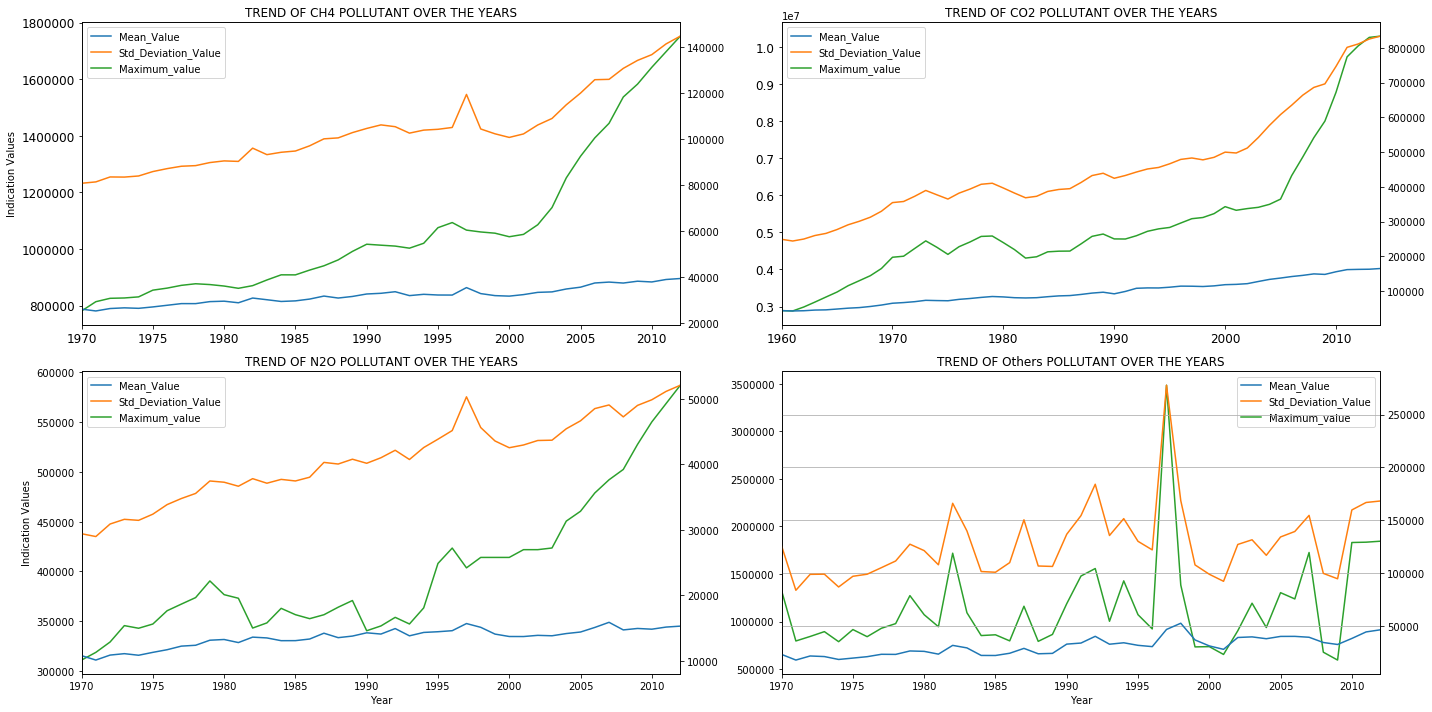

In [11]:
four_main_pollutant = ['CO2', 'CH4', 'N2O', 'Others']
df5 = Emmissions_C_df[Emmissions_C_df['Indicator Name'].isin(four_main_pollutant)]
df6 = df5[['Indicator Name', 'Indicator Value', 'Year']].groupby(['Indicator Name', 'Year']).agg(Mean_Value =('Indicator Value',np.mean),
                                                                                                                 Median_Value =('Indicator Value',np.median),
                                                                                                                 Std_Deviation_Value =('Indicator Value',np.std),
                                                                                                                  Total_Value =('Indicator Value',np.sum),
                                                                                                                 Minimum_value =('Indicator Value',np.min),
                                                                                                                 Maximum_value = ('Indicator Value', np.max)
                                                                                                                )
fig, axes = plt.subplots(2,2, figsize = (20,10))
CH4_df = df6.xs('CH4', level = 'Indicator Name')
CO2_df = df6.xs('CO2', level = 'Indicator Name')
N2O_df = df6.xs('N2O', level = 'Indicator Name')
Others_df = df6.xs('Others', level = 'Indicator Name')
CH4_df[['Mean_Value', 'Std_Deviation_Value', 'Maximum_value']].plot(ax = axes[0,0],secondary_y =['Mean_Value', 'Std_Deviation_Value'], mark_right = False); axes[0,0].set_title('TREND OF CH4 POLLUTANT OVER THE YEARS'); axes[0,0].set_ylabel('Indication Values')
CO2_df[['Mean_Value', 'Std_Deviation_Value', 'Maximum_value']].plot(ax = axes[0,1],secondary_y =['Mean_Value', 'Std_Deviation_Value'], mark_right = False); axes[0,1].set_title('TREND OF CO2 POLLUTANT OVER THE YEARS')
N2O_df[['Mean_Value', 'Std_Deviation_Value', 'Maximum_value']].plot(ax = axes[1,0],secondary_y =['Mean_Value', 'Std_Deviation_Value'], mark_right = False); axes[1,0].set_title('TREND OF N2O POLLUTANT OVER THE YEARS'); axes[1,0].set_ylabel('Indication Values')
Others_df[['Mean_Value', 'Std_Deviation_Value', 'Maximum_value']].plot(ax = axes[1,1],secondary_y =['Mean_Value', 'Std_Deviation_Value'], mark_right = False); axes[1,1].set_title('TREND OF Others POLLUTANT OVER THE YEARS')
axes[0,0].tick_params(axis = 'both', which = 'both', labelsize = 12, labelbottom = True)
axes[0,1].tick_params(axis = 'both', which = 'both', labelsize = 12, labelbottom = True)
plt.tight_layout()
plt.grid(which = 'both')

<h4>7.2</h4>
<p>What can you say about the <em>distribution</em> of emissions around the globe over the years? What information can you extract from the <em>tails</em> of these distributions over the years?</p>

Text(0.5, 1.0, 'Distribution of Others Emission Over years')

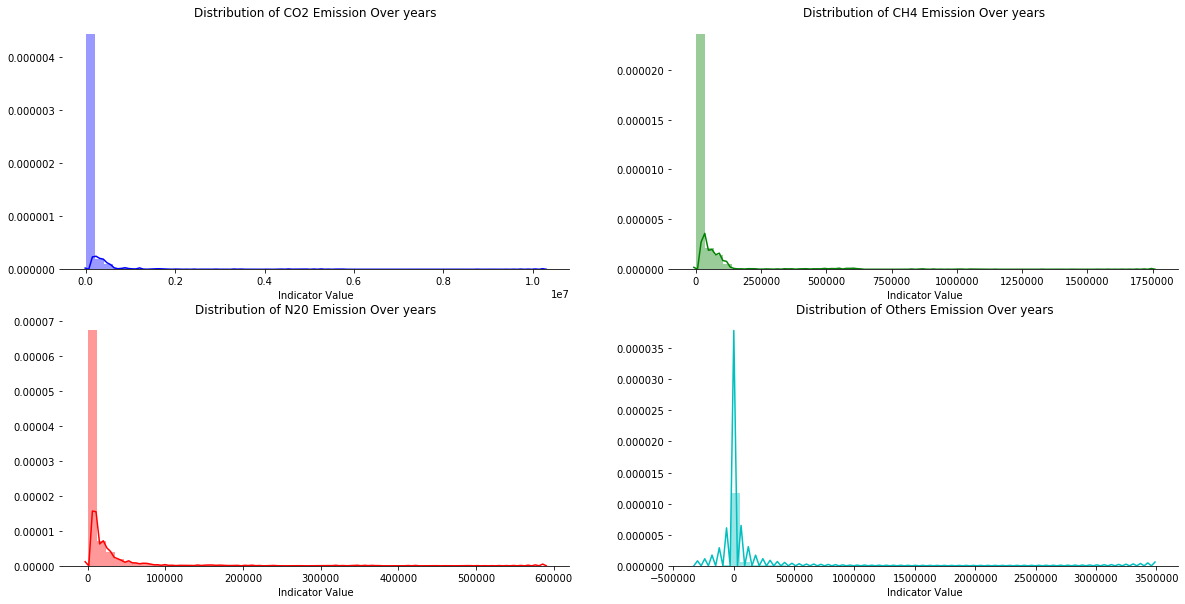

In [12]:
df7 = df5[['Indicator Name', 'Indicator Value', 'Year']]
fig, axes = plt.subplots(2,2, figsize =(20,10))
sns.despine(left = True)
sns.distplot(df7[df7['Indicator Name'] == 'CO2']['Indicator Value'], color = 'b', kde = True, ax = axes[0,0]); axes[0,0].set_title('Distribution of CO2 Emission Over years')
sns.distplot(df7[df7['Indicator Name'] == 'CH4']['Indicator Value'], color = 'g', kde = True, ax = axes[0,1]); axes[0,1].set_title('Distribution of CH4 Emission Over years')
sns.distplot(df7[df7['Indicator Name'] == 'N2O']['Indicator Value'], color = 'r', kde = True, ax = axes[1,0]); axes[1,0].set_title('Distribution of N20 Emission Over years')
sns.distplot(df7[df7['Indicator Name'] == 'Others']['Indicator Value'], color = 'c', kde = True, ax = axes[1,1]); axes[1,1].set_title('Distribution of Others Emission Over years')


<p>Compute a plot showing the behavior of each of the four main air pollutants for each of the main global regions in the <code>Emissions_R_df</code> data frame. The main regions are <code>'Latin America &amp; Caribbean', 'South Asia', 'Sub-Saharan Africa', 'Europe &amp; Central Asia', 'Middle East &amp; North Africa', 'East Asia &amp; Pacific'</code> and <code>'North America'</code>. What conclusions can you make?</p>

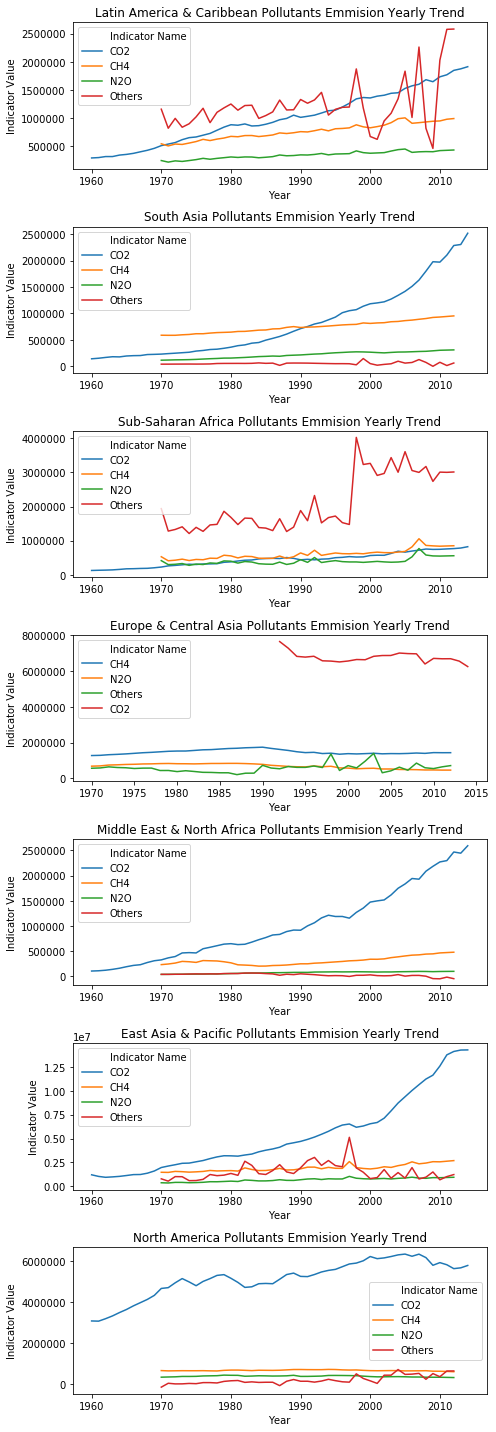

In [13]:
main_regions = ['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia','Middle East & North Africa', 'East Asia & Pacific', 'North America' ]
df8 = Emmissions_R_df[Emmissions_R_df['Indicator Name'].isin(four_main_pollutant)]
df9 = df8[df8['Country Name'].isin(main_regions)][['Indicator Name', 'Country Name', 'Year', 'Indicator Value']]
df9['Year'] =pd.to_datetime(df9['Year'])
fig, axes = plt.subplots(7,1,figsize = (7,20))
sns.lineplot(data = df9[df9['Country Name'] == 'Latin America & Caribbean'], x = 'Year', y = 'Indicator Value',hue = 'Indicator Name', ax = axes[0]);axes[0].set_title('Latin America & Caribbean Pollutants Emmision Yearly Trend')
sns.lineplot(data = df9[df9['Country Name'] == 'South Asia'], x = 'Year', y = 'Indicator Value',hue = 'Indicator Name',ax = axes[1]); axes[1].set_title('South Asia Pollutants Emmision Yearly Trend')
sns.lineplot(data = df9[df9['Country Name'] == 'Sub-Saharan Africa'], x = 'Year', y = 'Indicator Value',hue = 'Indicator Name',ax = axes[2]); axes[2].set_title('Sub-Saharan Africa Pollutants Emmision Yearly Trend')
sns.lineplot(data = df9[df9['Country Name'] == 'Europe & Central Asia'], x = 'Year', y = 'Indicator Value',hue = 'Indicator Name',ax = axes[3]); axes[3].set_title('Europe & Central Asia Pollutants Emmision Yearly Trend')
sns.lineplot(data = df9[df9['Country Name'] == 'Middle East & North Africa'], x = 'Year', y = 'Indicator Value',hue = 'Indicator Name',ax = axes[4]); axes[4].set_title('Middle East & North Africa Pollutants Emmision Yearly Trend')
sns.lineplot(data = df9[df9['Country Name'] == 'East Asia & Pacific'], x = 'Year', y = 'Indicator Value',hue = 'Indicator Name',ax = axes[5]); axes[5].set_title('East Asia & Pacific Pollutants Emmision Yearly Trend')
sns.lineplot(data = df9[df9['Country Name'] == 'North America'], x = 'Year', y = 'Indicator Value',hue = 'Indicator Name',ax = axes[6]); axes[6].set_title('North America Pollutants Emmision Yearly Trend')
plt.tight_layout()


<p>Which are the top five countries that have been in the top 10 of <code>CO2</code> emitters over the years? Have any of these countries made efforts to reduce the amount of CO2 emissions over the last 10 years?</p>

Top Ten Countries with CO2 Emmission:
                    Indicator Value
Country Name                       
United States          2.597893e+08
China                  1.704215e+08
Japan                  5.197259e+07
India                  3.876964e+07
Russian Federation     3.838037e+07
United Kingdom         3.100135e+07
Canada                 2.341059e+07
France                 2.145337e+07
Italy                  1.978202e+07
Germany                1.961740e+07
Top Five Countries: 
Index(['United States', 'China', 'Japan', 'India', 'Russian Federation'], dtype='object', name='Country Name')


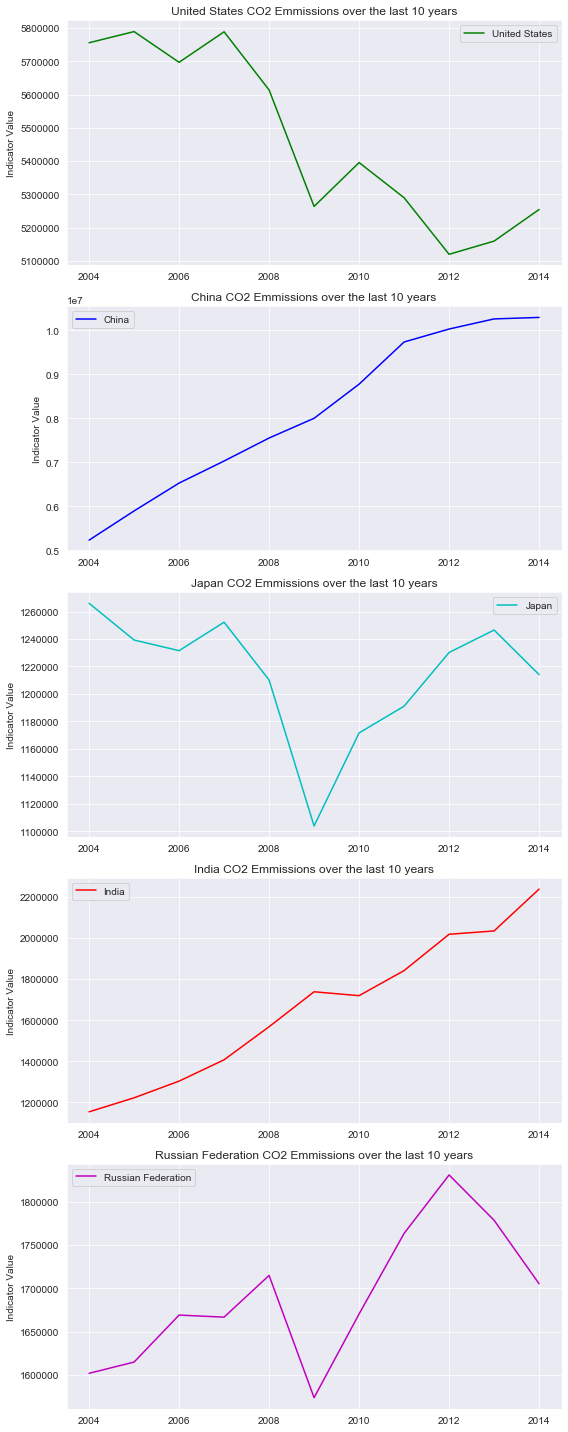

In [14]:
CO2_emmiters=  Emmissions_C_df[Emmissions_C_df['Indicator Name'] == 'CO2']
top_ten_countries_CO2_emmission = CO2_emmiters[['Country Name', 'Indicator Value']].groupby('Country Name').sum().sort_values(by = 'Indicator Value', ascending = False).head(10)
top_five_countries  = top_ten_countries_CO2_emmission.index[:5]
top_five_df =  CO2_emmiters[CO2_emmiters['Country Name'].isin(top_five_countries)]
print('Top Ten Countries with CO2 Emmission:')
print(top_ten_countries_CO2_emmission)
print('Top Five Countries: ')
print(top_five_countries)
top_five_df['Year'] = pd.to_datetime(top_five_df['Year']).dt.year
top_five_df_range_10years = top_five_df[np.logical_and(top_five_df['Year'] >= 2004, top_five_df['Year'] <= 2014 )]
sns.set_style('darkgrid')
fig, axes = plt.subplots(5,1,figsize=(8,20))
for data, subplot,color in zip(top_five_countries, axes, ['g', 'b', 'c', 'r', 'm']):
    x = top_five_df_range_10years[top_five_df_range_10years['Country Name'] == data]['Year']
    y = top_five_df_range_10years[top_five_df_range_10years['Country Name'] == data]['Indicator Value']
    subplot.plot(x, y, color = color, label = data)
    subplot.set_title(f'{data} CO2 Emmissions over the last 10 years')
    subplot.set_ylabel('Indicator Value')
    subplot.legend()
plt.tight_layout()


<p>Are these five countries carrying out the burden of most of the emissions emitted over the years globally? Can we say that the rest of the world is making some effort to control their polluted gasses emissions over the years?</p>

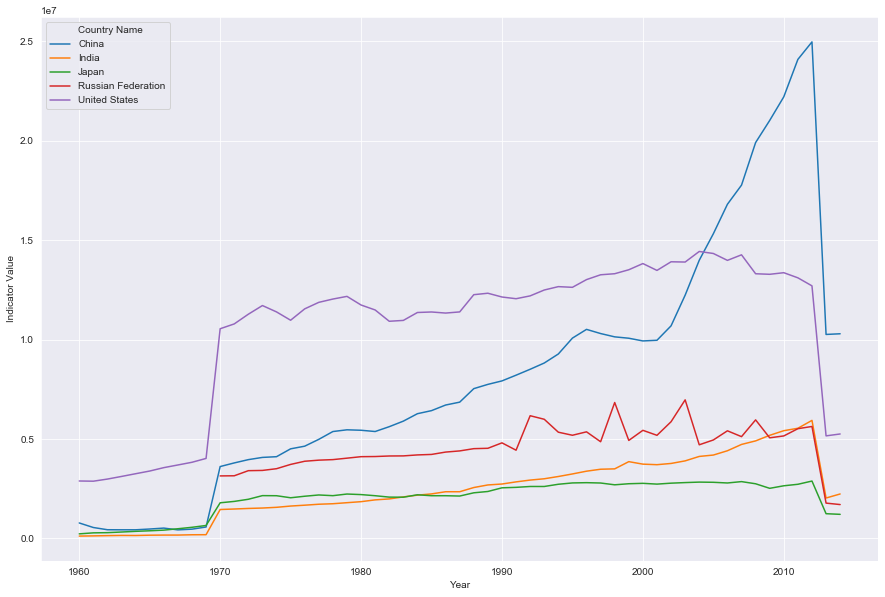

In [61]:
df17 = Emmissions_C_df.copy()
df17['Country Name'] = np.where(df17['Country Name'].isin(top_five_countries), df17['Country Name'], 'Others')
new_df =['CO2', 'CH4', 'N2O', 'Others', 'Total']
df17 = df17[df17['Indicator Name'].isin(new_df)]
df18 = df17.groupby(['Country Name', 'Year']).sum()
df18.reset_index(inplace =True)
df18['Year'] = pd.to_datetime(df18['Year']).dt.year
df18_other = df18[df18['Country Name'] == 'Others']
df18 = df18[df18['Country Name'] != 'Others']
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,10
sns.lineplot(data=df18,x= 'Year',y = 'Indicator Value', hue = 'Country Name')

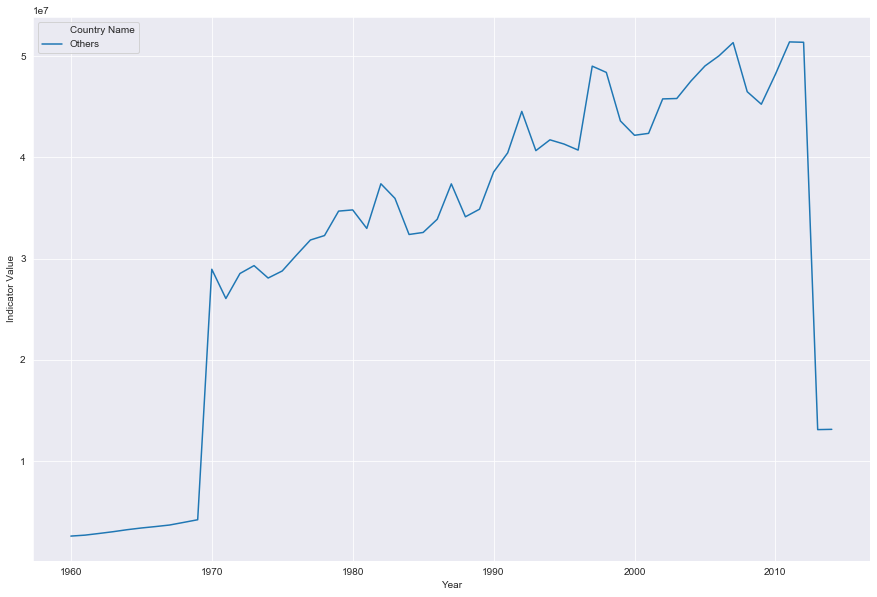

In [62]:
sns.lineplot(data=df18_other,x= 'Year',y = 'Indicator Value', hue = 'Country Name')


<p>One of the main contributions of poor health from air pollution is particulate matter. In particular, very small particles (those with a size less than 2.5 micrometres ($\mu$m)) can enter and affect the respiratory system. The <code>PM2.5</code> indicator measures the average level of exposure of a nation's population to concentrations of these small particles. The <code>PM2.5_WHO</code> measures the  percentage of the population who are exposed to ambient concentrations of these particles that exceed some thresholds set by the World Health Organization (WHO). In particular, countries with a higher <code>PM2.5_WHO</code> indicator are more likely to suffer from bad health conditions. </p>

<p>The client would like to know if there is any relationship between the <code>PM2.5_WHO</code> indicator and the level of income of the general population, as well as how this changes over time. What plot(s) might be helpful to solve the client's question?  What conclusion can you draw from your plot(s) to answer their question?</p>
<p><strong>Hint:</strong> The DataFrame <code>WDI_countries</code> contains a column named <code>Income Group</code>. </p>

Text(0.5, 1.0, 'Relationship between PM2.5_WHO Indicator Value and Income Groups')

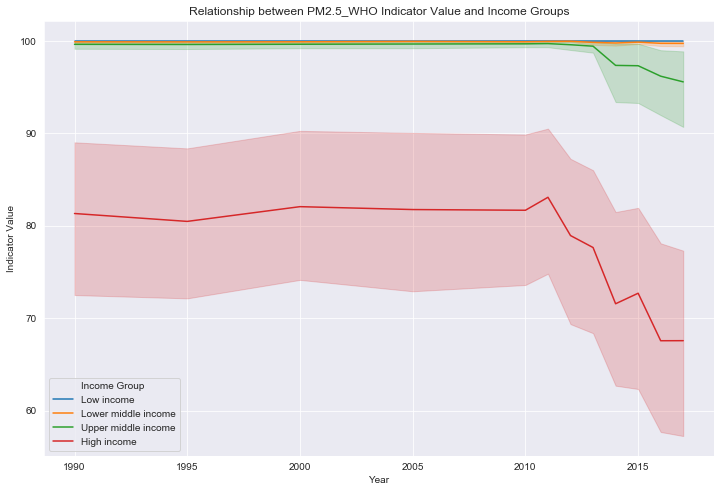

In [16]:
PM25_emmission = Emmissions_C_df[Emmissions_C_df['Indicator Name']== 'PM2.5_WHO']
df12 = PM25_emmission[['Indicator Name','Country Name', 'Country Code', 'Indicator Code','Year','Indicator Value']].set_index('Country Code').join(WDI_country[['Country Code', 'Income Group']].set_index('Country Code'))
df12['Year'] = pd.to_datetime(df12['Year']).dt.year 
plt.figure(figsize = (12,8))
sns.lineplot(data = df12, x= 'Year', y= 'Indicator Value', hue = 'Income Group')
plt.title('Relationship between PM2.5_WHO Indicator Value and Income Groups')


<p>Finally, our client is interested in investigating the impacts and relationships between <strong>high levels of exposure to particle matter</strong> and <strong>the health of the population</strong>. Coming up with additional data for this task may be infeasible for the client, thus they have asked us to search for relevant health data in the <code>WDIdata.csv</code> file and work with that. </p>


<p>Which indicators present in the file  <code>WDISeries.csv</code> file might be useful to solve the client's question? Explain.</p>
<p><strong>Note:</strong> Naming one or two indicators is more than enough for this question. </p>

In [64]:
import re
health = []
mortality = []
death = []
pollution = []
critical = []
for i in WDI_ids['Indicator Name']:
    if re.search(r'(Health|health|HEALTH)', i):
        health.append(i)
    elif re.search(r'(Mortality|mortality|MORTALITY)', i):
        mortality.append(i)
    elif re.search(r'(Death|death|DEATH)', i):
        death.append(i)
    elif re.search(r'(Pollution|pollution|POLLUTION)', i):
        pollution.append(i)
    elif re.search(r'(Critical|critical|CRITICAL)', i):
        critical.append(i)
poll_list = [i for i in list(set(pollution)) if 'population' in i]
mort_list = []
for i in set(mortality):
    if 'ambient air pollution' in i:
        mort_list.append(i)
indicators = mort_list + poll_list
indicators

['Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population)',
 'Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)',
 'Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population)',
 'PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-3 value (% of total)',
 'PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)',
 'PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-1 value (% of total)',
 'PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-2 value (% of total)']


<p>Use the indicators provided above to give valuable information to the client. </p>

Text(0.5, 1.0, 'Relationship between high levels of exposure to particle matter and the health of the population')

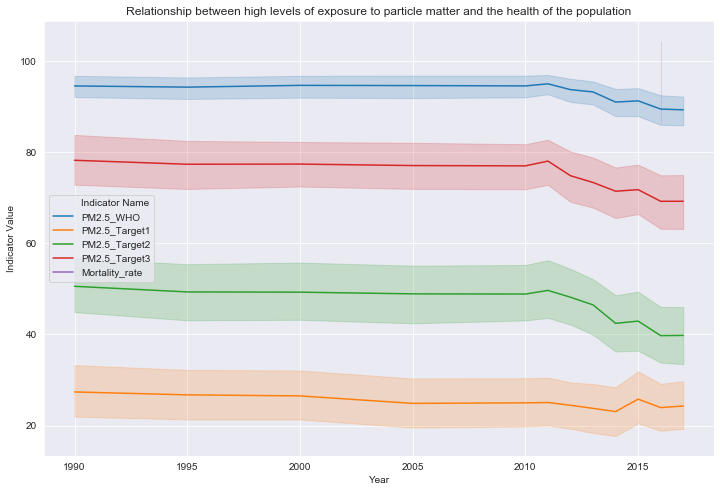

In [18]:
change_of_indicator = {
  
    'Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)': 'Mortality_rate',
    'PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)': 'PM2.5_WHO',
    'PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-3 value (% of total)': 'PM2.5_Target3',
    'PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-1 value (% of total)' : 'PM2.5_Target1',
    'PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-2 value (% of total)' : 'PM2.5_Target2' }
Indicator =  ['PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-3 value (% of total)',
 'PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-1 value (% of total)',
 'PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-2 value (% of total)',
 'PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)',
'Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)']
df13 = WDI_data[WDI_data['Indicator Name'].isin(Indicator)]
df13 = df13.loc[:, ~df13.columns.str.contains('Unnamed')]
df13['Indicator Name']= df13['Indicator Name'].replace(change_of_indicator)
id_var = ['Indicator Name',
 'Country Name',
 'Country Code',
 'Indicator Code']

df13 = pd.melt(df13, id_vars= id_var, var_name='Year', value_name='Indicator Value')
df13.dropna(inplace = True)
df13['Year'] = pd.to_datetime(df13['Year']).dt.year 
plt.figure(figsize = (12,8))
sns.lineplot(data = df13, x= 'Year', y= 'Indicator Value', hue = 'Indicator Name')
plt.title('Relationship between high levels of exposure to particle matter and the health of the population')


<p>Extend the analysis above to find some countries of interest. These are defined as</p>
<ul>
<li>The countries that have a high mortality rate due to household and ambient air pollution, but with low PM2.5 exposure</li>
<li>The countries that have a low mortality rate due to household and ambient air pollution, but with high PM2.5 exposure</li>
</ul>

In [19]:
'''
    It was checked and the Mortality Rate was only calculated for the year 2016,
    Thus the dataframe was selected with the year 2016.
    Also, The minimum of PM25 i.e 0 was chosen as the Low PM while 10% Mortality Rate was chosen as the Low Mortality Rate
'''
indicators = ['Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)',
             'PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)']
prob_df1 = WDI_data[WDI_data['Indicator Name'].isin(indicators)]
prob_df1 = prob_df1[~prob_df1['Country Name'].isin(Region)]
prob_df1 = pd.melt(prob_df1, id_vars= id_var, var_name='Year', value_name='Indicator Value')
prob_df1.dropna(inplace= True)
prob_df1 = prob_df1[prob_df1['Year']== '2016']
change_of_indicator = {
    'PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)': 'PM2.5_WHO',
    'Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)' : 'Mort_Rate'}
prob_df1['Indicator Name'] = prob_df1['Indicator Name'].replace(change_of_indicator)
df15 = prob_df1[['Indicator Name', 'Country Code', 'Indicator Value']].groupby(['Indicator Name', 'Country Code']).sum()
Mortality_df = df15.xs('Mort_Rate', level = 'Indicator Name')
Mortality_df.rename({'Indicator Value' : 'Mortality Value(% of total)'}, axis =1, inplace = True)
PM25_df = df15.xs('PM2.5_WHO', level = 'Indicator Name')
PM25_df.rename({'Indicator Value' : 'PM2.5_WHO_Value(% of total)'}, axis =1, inplace = True)
df16 = Mortality_df.join(PM25_df)
countries_with_low_Mort_rate_high_PM25 = (df16[(df16['Mortality Value(% of total)'] <=10) & (df16['PM2.5_WHO_Value(% of total)'] >0)]).join(WDI_country[['Country Code', 'Short Name']].set_index('Country Code'))
countries_with_high_Mort_rate_low_PM25 = df16[(df16['Mortality Value(% of total)'] >=10) & (df16['PM2.5_WHO_Value(% of total)']== 0)].join(WDI_country[['Country Code', 'Short Name']].set_index('Country Code'))
print('Countries With High Mortality Rate but Low PM2.5: ')
print(countries_with_high_Mort_rate_low_PM25)
print('-'*100)
print('Countries With Low Mortality Rate but High PM2.5: ')
print(countries_with_low_Mort_rate_high_PM25)

Countries With High Mortality Rate but Low PM2.5: 
              Mortality Value(% of total)  PM2.5_WHO_Value(% of total)  \
Country Code                                                             
BRN                                  13.3                          0.0   
EST                                  25.0                          0.0   
MDV                                  25.6                          0.0   

             Short Name  
Country Code             
BRN              Brunei  
EST             Estonia  
MDV            Maldives  
----------------------------------------------------------------------------------------------------
Countries With Low Mortality Rate but High PM2.5: 
              Mortality Value(% of total)  PM2.5_WHO_Value(% of total)  \
Country Code                                                             
AUS                                   8.4                    24.904209   
ESP                                   9.9                    40.724385   



<p>Finally, we want to look at the mortality data by income. We expect higher income countries to have lower pollution-related mortality. Find out if this assumption holds. Calculate summary statistics and histograms for each income category and note any trends.</p>

Text(0.5, 1, 'Mortality Value (% of total) per 100,000 population against Income Group')

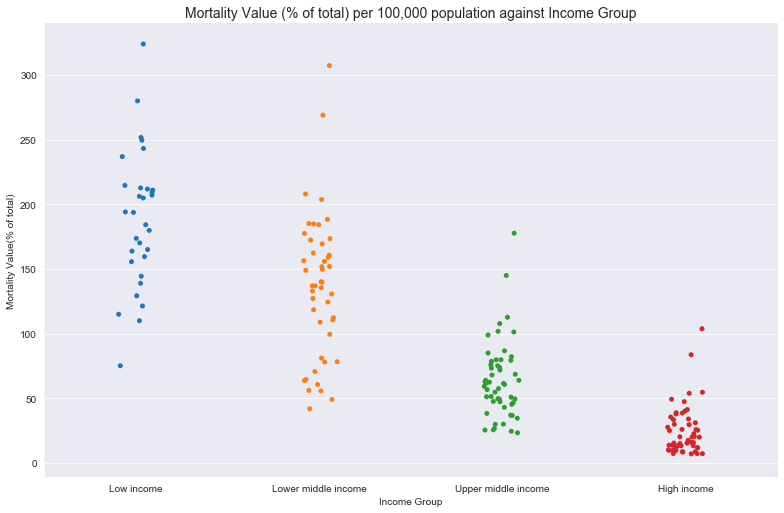

In [20]:
prob_df2 = Mortality_df.join(WDI_country[['Country Code', 'Short Name','Income Group']].set_index('Country Code'))
sns.catplot(y= 'Mortality Value(% of total)', x= 'Income Group', data = prob_df2, height = 7, aspect= 11/7)
plt.title('Mortality Value (% of total) per 100,000 population against Income Group', fontsize=14)

In [21]:
print(prob_df2.groupby('Income Group').describe())

Mortality Value(% of total)                               \
                                          count        mean        std   min   
Income Group                                                                   
High income                                52.0   25.142308  19.123534   7.0   
Low income                                 31.0  188.341935  52.959341  75.2   
Lower middle income                        46.0  136.441304  55.566699  41.9   
Upper middle income                        54.0   63.937037  29.618125  23.3   

                                                    
                        25%    50%      75%    max  
Income Group                                        
High income           11.90   20.0   33.625  103.8  
Low income           157.65  193.8  212.350  324.1  
Lower middle income  101.85  138.4  167.725  307.4  
Upper middle income   46.80   61.1   77.950  177.7

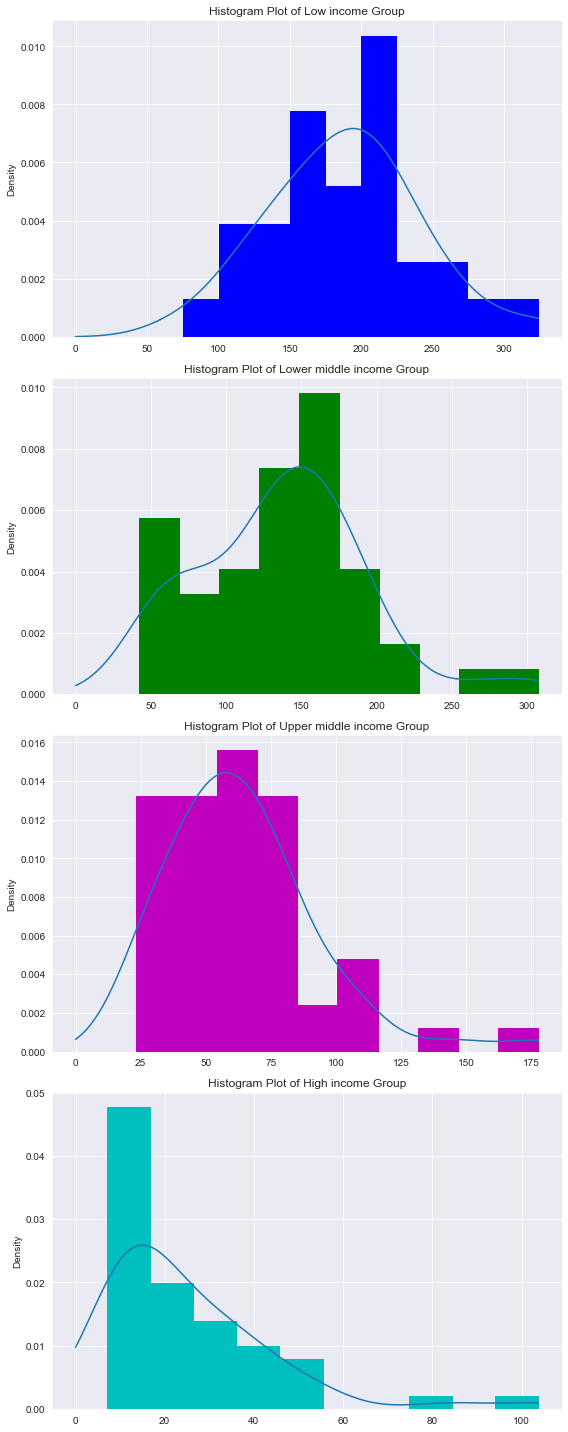

In [67]:
from scipy import stats
df,feature = prob_df2, 'Income Group'
fig, axes = plt.subplots(df[feature].nunique(),1, figsize =(8,20))
for data, subplot, color in zip(df[feature].unique(), axes, ['b', 'g', 'm', 'c']):
    x = np.linspace(0, df[df[feature]== data]['Mortality Value(% of total)'].max(), 100000)
    kde = stats.gaussian_kde(df[df[feature]== data]['Mortality Value(% of total)'])
    subplot.hist(df[df[feature]== data]['Mortality Value(% of total)'],density = True, color = color, ec = color)
    subplot.plot(x, kde(x))
    subplot.set_title(f'Histogram Plot of {data} Group')
    subplot.set_ylabel('Density')
plt.tight_layout()